In [1]:
import csv

# Read metrics for "New Algorithm"
with open('new/metrics-new.txt', 'r') as f:
    results_new = list(csv.DictReader(f, delimiter=',', quotechar='|'))

# Read metrics for "Pattern Algorithm"
with open('pattern/metrics-pattern.txt', 'r') as f:
    results_pattern = list(csv.DictReader(f, delimiter=',', quotechar='|'))

In [15]:
import matplotlib.pyplot as plt

# Metrics for "New Algorithm"
nodes_new = list(map(lambda x: int(x['nodes']), results_new))
edges_new = list(map(lambda x: int(x['edges']), results_new))
count_of_cliques_received_new = list(map(lambda x: int(x['cliques']), results_new))
calls_made_new = list(map(lambda x: int(x['calls']), results_new))
time_new = list(map(lambda x: float(x["time"]), results_new))
densities_new = list(map(lambda x: (2*x[0])/x[1] if x[1] != 0 else -1, zip(edges_new, nodes_new)))
size_new = list(map(lambda x: x[0] + x[1], zip(edges_new, nodes_new)))

# Metrics for "Patter Algorithm"
nodes_pattern = list(map(lambda x: int(x['nodes']), results_pattern))
edges_pattern = list(map(lambda x: int(x['edges']), results_pattern))
count_of_cliques_received_pattern = list(map(lambda x: int(x['cliques']), results_pattern))
calls_made_pattern = list(map(lambda x: int(x['calls']), results_pattern))
time_pattern = list(map(lambda x: float(x["time"]), results_pattern))
densities_pattern = list(map(lambda x: (2*x[0])/x[1] if x[1] != 0 else -1, zip(edges_pattern, nodes_pattern)))
size_pattern = list(map(lambda x: x[0] + x[1], zip(edges_pattern, nodes_pattern)))

## Densities vs. Recursive calls made

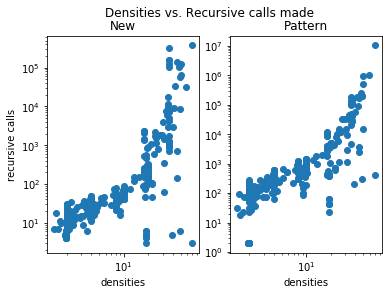

In [6]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Densities vs. Recursive calls made')

# "New Algorithm"
ax_new.plot(densities_new, calls_made_new, 'o')
ax_new.set(xlabel='densities', ylabel='recursive calls')
ax_new.set(xscale='log', yscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.plot(densities_pattern, calls_made_pattern, 'o')
ax_pattern.set(xlabel='densities')
ax_pattern.set(xscale='log', yscale='log')
ax_pattern.set_title('Pattern')

plt.savefig("plots/densities_recur_calls")

plt.show()

## Size vs. Recursive calls made

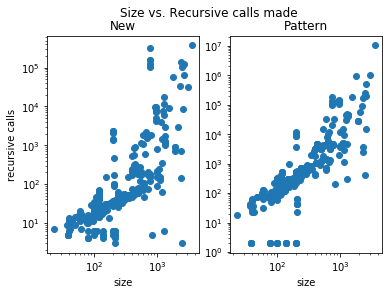

In [26]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Size vs. Recursive calls made')

# "New Algorithm"
ax_new.plot(size_new, calls_made_new, 'o')
ax_new.set(xlabel='size', ylabel='recursive calls')
ax_new.set(xscale='log', yscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.plot(size_pattern, calls_made_pattern, 'o')
ax_pattern.set(xlabel='size')
ax_pattern.set(xscale='log', yscale='log')
ax_pattern.set_title('Pattern')

plt.savefig("plots/size_recur_calls")

plt.show()

## Densities vs. Recursive calls made (DIFF)

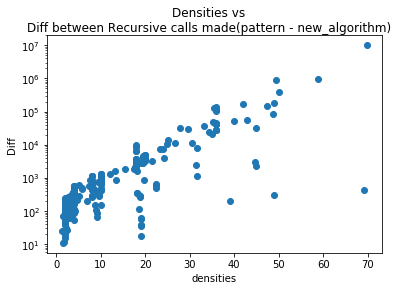

In [27]:
fig, ax = plt.subplots()

fig.suptitle('Densities vs\nDiff between Recursive calls made(pattern - new_algorithm)')

diff = list(map(lambda e: e[0] - e[1], zip(calls_made_pattern, calls_made_new)))

ax.plot(densities_new, diff, 'o')
ax.set(xlabel='densities', ylabel='Diff')
ax.set(yscale='log')
plt.savefig("plots/densities_recur_calls_diff")

plt.show()

## Size vs. Recursive calls made (DIFF)

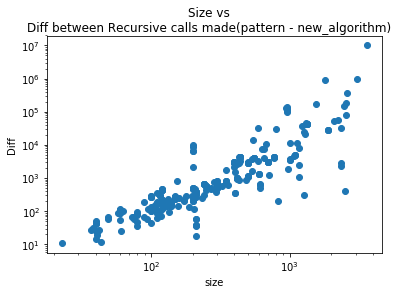

In [33]:
fig, ax = plt.subplots()

fig.suptitle('Size vs\nDiff between Recursive calls made(pattern - new_algorithm)')

diff = list(map(lambda e: e[0] - e[1], zip(calls_made_pattern, calls_made_new)))

ax.plot(size_new, diff, 'o')
ax.set(xlabel='size', ylabel='Diff')
ax.set(xscale='log', yscale='log')
plt.savefig("plots/size_recur_calls_diff")

plt.show()

## Recursive calls made in _pattern_ vs. Recursive calls made (DIFF)

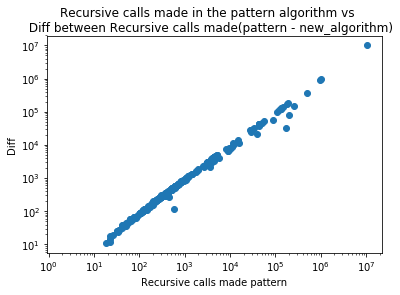

In [17]:
fig, ax = plt.subplots()

fig.suptitle('Recursive calls made in the pattern algorithm vs \n Diff between Recursive calls made(pattern - new_algorithm)')

diff = list(map(lambda e: e[0] - e[1], zip(calls_made_pattern, calls_made_new)))

ax.plot(calls_made_pattern, diff, 'o')
ax.set(xlabel='Recursive calls made pattern', ylabel='Diff')
ax.set(xscale='log', yscale='log')

plt.savefig("plots/recur_calls_diff_vs_recursive_calls_pattern")

plt.show()

## Densities vs Diff between Recursive calls made normalized((pattern - new)/new)

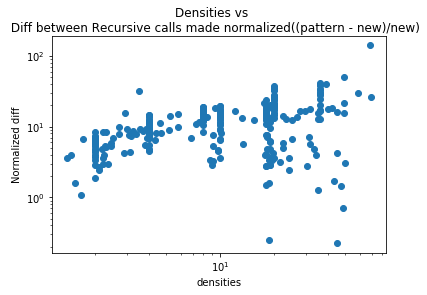

In [29]:
fig, ax = plt.subplots()

fig.suptitle('Densities vs \n Diff between Recursive calls made normalized((pattern - new)/new)')
diff = list(map(lambda e: (e[0]-e[1]) / e[1], zip(calls_made_pattern, calls_made_new)))

ax.plot(densities_new, diff, 'o')
ax.set(xlabel='densities', ylabel='Normalized diff')
ax.set(xscale='log', yscale='log')

plt.savefig("plots/normalized_recur_calls_diff_vs_densities")

plt.show()

## Size vs Diff between Recursive calls made normalized((pattern - new)/new)

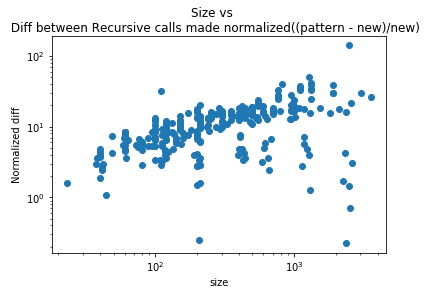

In [30]:
fig, ax = plt.subplots()

fig.suptitle('Size vs \n Diff between Recursive calls made normalized((pattern - new)/new)')
diff = list(map(lambda e: (e[0]-e[1]) / e[1], zip(calls_made_pattern, calls_made_new)))

ax.plot(size_new, diff, 'o')
ax.set(xlabel='size', ylabel='Normalized diff')
ax.set(xscale='log', yscale='log')

plt.savefig("plots/normalized_recur_calls_diff_vs_size")

plt.show()

## Densities vs. Cliques received (workers -> master)

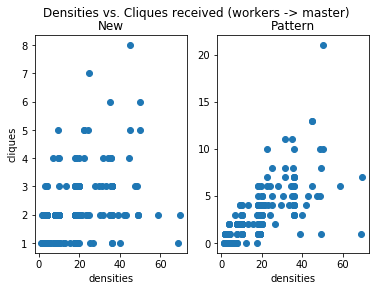

In [11]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Densities vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.plot(densities_new, count_of_cliques_received_new, 'o')
ax_new.set(xlabel='densities', ylabel='cliques')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.plot(densities_pattern, count_of_cliques_received_pattern, 'o')
ax_pattern.set(xlabel='densities')
ax_pattern.set_title('Pattern')

plt.savefig("plots/densities_cliques")

plt.show()

## Size vs. Cliques received (workers -> master)

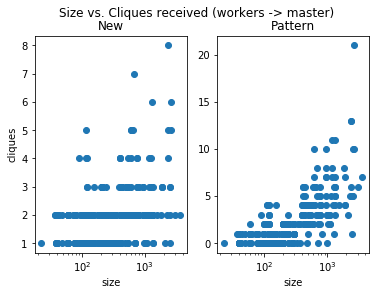

In [34]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Size vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.plot(size_new, count_of_cliques_received_new, 'o')
ax_new.set(xlabel='size', ylabel='cliques')
ax_new.set(xscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.plot(size_pattern, count_of_cliques_received_pattern, 'o')
ax_pattern.set(xlabel='size')
ax_pattern.set(xscale='log')
ax_pattern.set_title('Pattern')

plt.savefig("plots/size_cliques")

plt.show()

## Nodes vs. Cliques received (workers -> master)

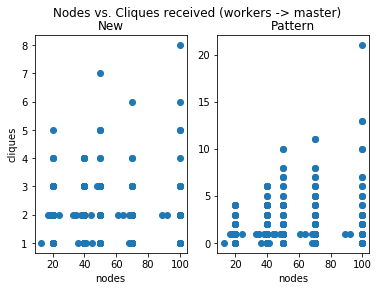

In [21]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Nodes vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.plot(nodes_new, count_of_cliques_received_new, 'o')
ax_new.set(xlabel='nodes', ylabel='cliques')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.plot(nodes_pattern, count_of_cliques_received_pattern, 'o')
ax_pattern.set(xlabel='nodes')
ax_pattern.set_title('Pattern')

plt.savefig("plots/nodes_cliques")

plt.show()

## Edges vs. Cliques received (workers -> master)

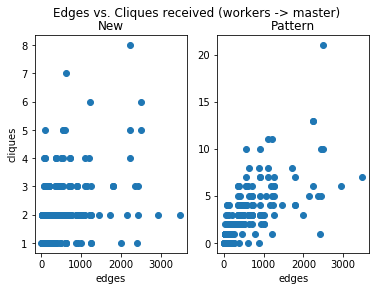

In [13]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Edges vs. Cliques received (workers -> master)')

# "New Algorithm"
ax_new.plot(edges_new, count_of_cliques_received_new, 'o')
ax_new.set(xlabel='edges', ylabel='cliques')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.plot(edges_pattern, count_of_cliques_received_pattern, 'o')
ax_pattern.set(xlabel='edges')
ax_pattern.set_title('Pattern')

plt.savefig("plots/edges_cliques")

plt.show()

## Densities vs. Time used

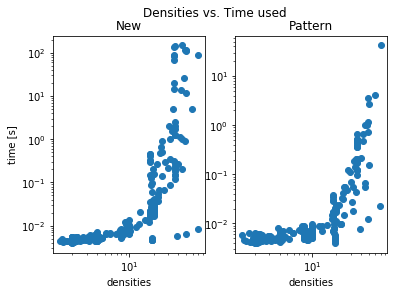

In [14]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Densities vs. Time used')

# "New Algorithm"
ax_new.plot(densities_new, time_new, 'o')
ax_new.set(xlabel='densities', ylabel='time [s]')
ax_new.set(xscale='log', yscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.plot(densities_pattern, time_pattern, 'o')
ax_pattern.set(xlabel='densities')
ax_pattern.set(xscale='log', yscale='log')
ax_pattern.set_title('Pattern')

plt.savefig("plots/densities_time")

plt.show()

## Size vs. Time used

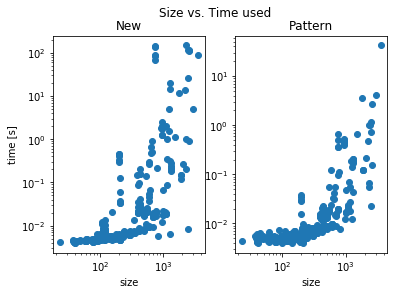

In [32]:
fig, (ax_new, ax_pattern) = plt.subplots(1, 2)

fig.suptitle('Size vs. Time used')

# "New Algorithm"
ax_new.plot(size_new, time_new, 'o')
ax_new.set(xlabel='size', ylabel='time [s]')
ax_new.set(xscale='log', yscale='log')
ax_new.set_title('New')

# "Pattern Algorithm"
ax_pattern.plot(size_pattern, time_pattern, 'o')
ax_pattern.set(xlabel='size')
ax_pattern.set(xscale='log', yscale='log')
ax_pattern.set_title('Pattern')

plt.savefig("plots/size_time")

plt.show()